# CWRU四分类任务实验

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import os
DATA_DIR_PATH = 'data'
datasets = ['train','test2']
train_files = ['NORMAL','B','OR','IR']
train_file_nums = [2,6,14,6]
test_file = 'TEST'
test_file_num = 142

# 训练集说明

## 一、数据说明
数据中包含一个文件夹，train，用作训练集。   
train文件夹中有多个数据文件，文件名含义如下：   
B代表故障发生在Ball位置，同理IR代表故障发生在inner race位置，OR代表故障发生在outer race位置，NORMAL代表数据文件是正常数据文件；   
每个数据文件可能包含如下多维信号（部分文件可能其中不包括某些维度的信号）：   
DE_time:驱动端加速度数据   
FE_time:风扇端加速度数据   
BA_time:基本加速度数据   
RPM:每分钟转速数据，在提取时实际上RPM对于每个文件只有一个值，但为了文件格式整齐，扩展成了一列，即实际上这一列都是同一个值，代表该文件的RPM

## 二、任务说明

1、训练一个四分类模型，预测目标为故障发生的位置(normal, ball, inner race, outer race)   
2、以train文件夹中的数据为训练集，可自行划分数据作为验证集进行模型的验证调优。

## 三、可供参考的评分规则
评分score为分别单独计算四类预测结果的f1-score加权求和，
其中三个故障类的权重ball,inner race,outer race均为0.3，正常类的权重为0.1   

# 数据处理
## normal data

In [2]:
# load normal data
for i in range(train_file_nums[0]):
    tmp_data = pd.read_csv(os.path.join(DATA_DIR_PATH, datasets[0], train_files[0]+"0"+str(i+1)+".csv"))
    tmp_data['label'] = 0
    tmp_data['file'] = i+1
    if i == 0:
        normal_data = tmp_data
    else:
        normal_data = pd.concat([normal_data, tmp_data], axis = 0)
normal_data

,DE_time,FE_time,RPM,label,file
0,-0.057369,-0.070676,1796.0,0,1
1,-0.083863,-0.091016,1796.0,0,1
2,-0.070303,-0.110535,1796.0,0,1
3,-0.065297,-0.094304,1796.0,0,1
4,-0.076145,-0.021573,1796.0,0,1
...,...,...,...,...,...
362922,-0.021070,-0.008835,NaN,0,2
362923,-0.012934,0.008424,NaN,0,2
362924,-0.039220,0.041502,NaN,0,2
362925,-0.065088,0.056705,NaN,0,2


发现部分RPM为NaN，数据忘了给，应该是1771.0，添加上去。

In [3]:
# load normal data
for i in range(train_file_nums[0]):
    tmp_data = pd.read_csv(os.path.join(DATA_DIR_PATH, datasets[0], train_files[0]+"0"+str(i+1)+".csv"))
    tmp_data['label'] = 0
    tmp_data['file'] = i+1
    if i == 1:
        tmp_data['RPM'] = 1771
    if i == 0:
        normal_data = tmp_data
    else:
        normal_data = pd.concat([normal_data, tmp_data], axis = 0)
normal_data

,DE_time,FE_time,RPM,label,file
0,-0.057369,-0.070676,1796,0,1
1,-0.083863,-0.091016,1796,0,1
2,-0.070303,-0.110535,1796,0,1
3,-0.065297,-0.094304,1796,0,1
4,-0.076145,-0.021573,1796,0,1
...,...,...,...,...,...
362922,-0.021070,-0.008835,1771,0,2
362923,-0.012934,0.008424,1771,0,2
362924,-0.039220,0.041502,1771,0,2
362925,-0.065088,0.056705,1771,0,2


## Ball

In [4]:
# load Ball data
for i in range(train_file_nums[1]):
    tmp_data = pd.read_csv(os.path.join(DATA_DIR_PATH, datasets[0], train_files[1]+"0"+str(i+1)+".csv"))
    tmp_data['label'] = 1
    tmp_data['file'] = i+1
    if i == 0:
        ball_data = tmp_data
    else:
        ball_data = pd.concat([ball_data, tmp_data], axis = 0)
ball_data

,DE_time,FE_time,BA_time,RPM,label,file
0,0.191511,-0.036982,-0.008208,1796,1,1
1,0.150577,0.044995,-0.015532,1796,1,1
2,-0.036873,-0.008629,0.003823,1796,1,1
3,-0.076182,0.104782,0.021125,1796,1,1
4,0.029563,0.128409,-0.009375,1796,1,1
...,...,...,...,...,...,...
14599,-0.034924,0.109302,0.003702,1774,1,6
14600,0.014619,-0.043145,0.003259,1774,1,6
14601,-0.023553,0.154707,-0.017020,1774,1,6
14602,0.036548,0.051980,0.030902,1774,1,6


## outer race

In [5]:
# load outer race data
for i in range(train_file_nums[2]):
    if i >= 9:
        filename = train_files[2]+str(i+1)+".csv"
    else:
        filename = train_files[2]+"0"+str(i+1)+".csv"
    tmp_data = pd.read_csv(os.path.join(DATA_DIR_PATH, datasets[0], filename))
    tmp_data['label'] = 2
    tmp_data['file'] = i+1
    if i == 0:
        or_data = tmp_data
    else:
        or_data = pd.concat([or_data, tmp_data], axis = 0)
or_data

,DE_time,FE_time,BA_time,RPM,label,file
0,0.693192,0.033489,0.043497,1797,2,1
1,-0.039797,0.202167,-0.056896,1797,2,1
2,-0.635934,0.379475,-0.060758,1797,2,1
3,-0.192892,0.087318,0.022654,1797,2,1
4,0.571366,0.174842,0.067599,1797,2,1
...,...,...,...,...,...,...
7340,-0.005685,-0.076018,-0.090896,1771,2,14
7341,0.913292,0.018080,-0.058666,1771,2,14
7342,-0.666796,0.134778,0.054763,1771,2,14
7343,-1.364049,-0.017669,0.080193,1771,2,14


## inner race

In [6]:
# load inner race data
for i in range(train_file_nums[3]):
    tmp_data = pd.read_csv(os.path.join(DATA_DIR_PATH, datasets[0], train_files[3]+"0"+str(i+1)+".csv"))
    tmp_data['label'] = 3
    tmp_data['file'] = i+1
    if i == 0:
        ir_data = tmp_data
    else:
        ir_data = pd.concat([ir_data, tmp_data], axis = 0)
ir_data

,DE_time,FE_time,BA_time,RPM,label,file
0,0.234394,-0.129436,-0.017906,1797,3,1
1,0.265581,-0.058144,-0.135037,1797,3,1
2,0.167308,-0.362011,0.035530,1797,3,1
3,0.159999,-0.209975,0.051544,1797,3,1
4,0.016081,0.088345,-0.014003,1797,3,1
...,...,...,...,...,...,...
14581,-1.325065,0.366942,0.298199,1774,3,6
14582,1.087503,0.276953,0.235992,1774,3,6
14583,1.670239,0.091222,0.198652,1774,3,6
14584,-0.517762,-0.041091,0.041847,1774,3,6


In [7]:
# 合并到一起
train_data = pd.concat([normal_data,ball_data,or_data,ir_data])
train_data

,DE_time,FE_time,RPM,label,file,BA_time
0,-0.057369,-0.070676,1796,0,1,NaN
1,-0.083863,-0.091016,1796,0,1,NaN
2,-0.070303,-0.110535,1796,0,1,NaN
3,-0.065297,-0.094304,1796,0,1,NaN
4,-0.076145,-0.021573,1796,0,1,NaN
...,...,...,...,...,...,...
14581,-1.325065,0.366942,1774,3,6,0.298199
14582,1.087503,0.276953,1774,3,6,0.235992
14583,1.670239,0.091222,1774,3,6,0.198652
14584,-0.517762,-0.041091,1774,3,6,0.041847


In [8]:
# 查找是否有空项
train_data[train_data.isnull().T.any()]

,DE_time,FE_time,RPM,label,file,BA_time
0,-0.057369,-0.070676,1796,0,1,NaN
1,-0.083863,-0.091016,1796,0,1,NaN
2,-0.070303,-0.110535,1796,0,1,NaN
3,-0.065297,-0.094304,1796,0,1,NaN
4,-0.076145,-0.021573,1796,0,1,NaN
...,...,...,...,...,...,...
362922,-0.021070,-0.008835,1771,0,2,NaN
362923,-0.012934,0.008424,1771,0,2,NaN
362924,-0.039220,0.041502,1771,0,2,NaN
362925,-0.065088,0.056705,1771,0,2,NaN


In [9]:
# 用均值填充train_data的NaN
train_data.BA_time = train_data.BA_time.fillna(train_data.BA_time.mean())
train_data

,DE_time,FE_time,RPM,label,file,BA_time
0,-0.057369,-0.070676,1796,0,1,0.005471
1,-0.083863,-0.091016,1796,0,1,0.005471
2,-0.070303,-0.110535,1796,0,1,0.005471
3,-0.065297,-0.094304,1796,0,1,0.005471
4,-0.076145,-0.021573,1796,0,1,0.005471
...,...,...,...,...,...,...
14581,-1.325065,0.366942,1774,3,6,0.298199
14582,1.087503,0.276953,1774,3,6,0.235992
14583,1.670239,0.091222,1774,3,6,0.198652
14584,-0.517762,-0.041091,1774,3,6,0.041847


In [10]:
# 是不是全都非空
train_data[train_data.isnull().T.any()]

,DE_time,FE_time,RPM,label,file,BA_time


In [11]:
train_data.describe()

,DE_time,FE_time,RPM,label,file,BA_time
count,823892.000000,823892.000000,823892.000000,823892.000000,823892.000000,823892.000000
mean,0.012043,0.032062,1781.108013,0.674726,2.781851,0.005471
std,0.216713,0.110312,12.062677,1.052081,2.549525,0.040706
min,-5.201985,-1.656375,1771.000000,0.000000,1.000000,-0.705454
25%,-0.045895,-0.025271,1771.000000,0.000000,1.000000,0.005471
50%,0.013560,0.030613,1772.000000,0.000000,2.000000,0.005471
75%,0.070303,0.088756,1796.000000,1.000000,2.000000,0.005471
max,5.509800,1.855665,1797.000000,3.000000,14.000000,0.834487


# 特征提取
想要提取的数据有：
* 时域：(18个)
* 均值，标准差，最大值，最小值，均方根，峰峰值，中位数，四分位差，百分位差，
偏度，峰度，方差，整流平均值，方根幅值，波形因子，峰值因子，脉冲值，裕度
* 频域：(27个)
* 均值，标准差，最大值，最小值，均方根，中位数，四分位差，百分位差，
f2，f3，f4反映频谱集中程度，
f5，f6，f7，f8反映主频带位置，
5级小波变换，最后输出6个能量特征和其归一化能量特征

In [12]:
from scipy import stats,signal,fftpack
from pywt import wavedec
# 特征提取
# 时域：
# 均值，标准差，最大值，最小值，均方根，峰峰值，中位数，四分位差，百分位差，
# 偏度，峰度，方差，整流平均值，方根幅值，波形因子，峰值因子，脉冲值，裕度
# 频域：
# 均值，标准差，最大值，最小值，均方根，中位数，四分位差，百分位差
# f2 f3 f4反映频谱集中程度
# f5 f6 f7 f8反映主频带位置
# 5级小波变换，最后输出6个能量特征和其归一化能量特征
columns = ['time_mean','time_std','time_max','time_min','time_rms','time_ptp','time_median',
                                     'time_iqr','time_pr','time_skew','time_kurtosis','time_var','time_amp',
                                     'time_smr','time_wavefactor','time_peakfactor','time_pulse','time_margin',
                                     'freq_mean','freq_std','freq_max','freq_min','freq_rms','freq_median',
                                     'freq_iqr','freq_pr','freq_f2','freq_f3','freq_f4','freq_f5','freq_f6','freq_f7',
                                     'freq_f8','ener_cA5','ener_cD1','ener_cD2','ener_cD3','ener_cD4','ener_cD5',
                                     'ratio_cA5','ratio_cD1','ratio_cD2','ratio_cD3','ratio_cD4','ratio_cD5']
data_names = ['DE_','FE_'] # 由于TEST中只有这两列数据，所以不能使用BA
new_columns = []
for data_name in data_names:
    new_columns.extend([data_name+j for j in columns])


def get_file_features(this_file_data,windowlen):
    '''
    type (DataFrame，int)
    '''
    n_line = this_file_data.shape[0]
    print("Total lines:",n_line)
    features = []
    for i in range (0,n_line,windowlen):
        if (n_line - i)/windowlen >= 1: #舍去少量数据
#             df = this_file_data.loc[i:i+windowlen,['BA_time','DE_time','FE_time']]
            df = this_file_data.loc[i:i+windowlen,['DE_time','FE_time']]
#                 print(df)
            feature_list = []
            for col in df.columns:
                df_line = df[col]
#                     print(df_line)
#                     时域特征
#                     依次为均值，标准差，最大值，最小值，均方根，峰峰值，中位数，四分位差，百分位差（P_90-P_10），
                time_mean = df_line.mean()                                           
                time_std = df_line.std()
                time_max = df_line.max()
                time_min = df_line.min()
                time_rms = np.sqrt(np.square(df_line).mean())
                time_ptp = time_max-time_min 
                time_median = np.median(df_line)
                time_iqr = np.percentile(df_line,75)-np.percentile(df_line,25)
                time_pr = np.percentile(df_line,90)-np.percentile(df_line,10)
#                     偏度，峰度，方差，整流平均值，方根幅值，
                time_skew = stats.skew(df_line)
                time_kurtosis = stats.kurtosis(df_line)
                time_var = np.var(df_line)
                time_amp = np.abs(df_line).mean()
                time_smr = np.square(np.sqrt(np.abs(df_line)).mean())
#                     波形因子，峰值因子，脉冲值，裕度
#                     下面四个特征需要注意分母为0或接近0问题，可能会发生报错
                time_wavefactor = time_rms/time_amp
                time_peakfactor = time_max/time_rms
                time_pulse = time_max/time_amp
                time_margin = time_max/time_smr
#                     频域特征
#                     采样频率25600Hz
                df_fftline = fftpack.fft(df[col])
                freq_fftline = fftpack.fftfreq(len(df[col]),1/25600)
                df_fftline = abs(df_fftline[freq_fftline>=0])
                freq_fftline = freq_fftline[freq_fftline>=0]
                # 基本特征,依次为均值，标准差，最大值，最小值，均方根，中位数，四分位差，百分位差
                freq_mean = df_fftline.mean()
                freq_std = df_fftline.std()
                freq_max = df_fftline.max()
                freq_min = df_fftline.min()
                freq_rms = np.sqrt(np.square(df_fftline).mean())
                freq_median = np.median(df_fftline)
                freq_iqr = np.percentile(df_fftline,75)-np.percentile(df_fftline,25)
                freq_pr = np.percentile(df_fftline,90)-np.percentile(df_fftline,10)
                # f2 f3 f4反映频谱集中程度
                freq_f2 = np.square((df_fftline-freq_mean)).sum()/(len(df_fftline)-1)
                freq_f3 = pow((df_fftline-freq_mean),3).sum()/(len(df_fftline)*pow(freq_f2,1.5))
                freq_f4 = pow((df_fftline-freq_mean),4).sum()/(len(df_fftline)*pow(freq_f2,2))
                # f5 f6 f7 f8反映主频带位置
                freq_f5 = np.multiply(freq_fftline,df_fftline).sum()/df_fftline.sum()
                freq_f6 = np.sqrt(np.multiply(np.square(freq_fftline),df_fftline).sum())/df_fftline.sum()
                freq_f7 = np.sqrt(np.multiply(pow(freq_fftline,4),df_fftline).sum())/np.multiply(np.square(freq_fftline),df_fftline).sum()
                freq_f8 = np.multiply(np.square(freq_fftline),df_fftline).sum()/np.sqrt(np.multiply(pow(freq_fftline,4),df_fftline).sum()*df_fftline.sum())
                #----------  timefreq-domain feature,12
                # 5级小波变换，最后输出6个能量特征和其归一化能量特征
                cA5, cD5, cD4, cD3, cD2, cD1 = wavedec(df[col], 'db10', level=5)
                ener_cA5 = np.square(cA5).sum()
                ener_cD5 = np.square(cD5).sum()
                ener_cD4 = np.square(cD4).sum()
                ener_cD3 = np.square(cD3).sum()
                ener_cD2 = np.square(cD2).sum()
                ener_cD1 = np.square(cD1).sum()
                ener = ener_cA5 + ener_cD1 + ener_cD2 + ener_cD3 + ener_cD4 + ener_cD5
                ratio_cA5 = ener_cA5/ener
                ratio_cD5 = ener_cD5/ener
                ratio_cD4 = ener_cD4/ener
                ratio_cD3 = ener_cD3/ener
                ratio_cD2 = ener_cD2/ener
                ratio_cD1 = ener_cD1/ener

                feature_list.extend([time_mean,time_std,time_max,time_min,time_rms,time_ptp,time_median,
                                     time_iqr,time_pr,time_skew,time_kurtosis,time_var,time_amp,
                                     time_smr,time_wavefactor,time_peakfactor,time_pulse,time_margin,
                                     freq_mean,freq_std,freq_max,freq_min,freq_rms,freq_median,
                                     freq_iqr,freq_pr,freq_f2,freq_f3,freq_f4,freq_f5,freq_f6,freq_f7,
                                     freq_f8,ener_cA5,ener_cD1,ener_cD2,ener_cD3,ener_cD4,ener_cD5,
                                     ratio_cA5,ratio_cD1,ratio_cD2,ratio_cD3,ratio_cD4,ratio_cD5])
            features.append(feature_list)
    features = np.asarray(features)
    return features


def get_features(train_files,train_data,windowlen):
    '''
    type list,DataFrame,int
    '''
    flag = 0
    for label in range(len(train_files)):
        print('This label is:',train_files[label],label)
        this_label_data = train_data[train_data.label == label]
        n_file = max(this_label_data.file)
        for file_index in range(1,n_file+1):
            print("this file's index is:",file_index)
            this_file_data = this_label_data[this_label_data.file == file_index]
            if flag == 0:
                features = get_file_features(this_file_data,windowlen)
                flag += 1
                labels = [label for j in range(features.shape[0])]
            else:
                new_features = get_file_features(this_file_data,windowlen)
                features = np.concatenate((features, new_features), axis=0)
                labels.extend([label for j in range(new_features.shape[0])])
    features = np.asarray(features)
    labels = np.asarray(labels)
    return features,labels


DATA_DIR_PATH = 'data'
datasets = ['train','test2']
train_files = ['NORMAL','B','OR','IR']
train_file_nums = [2,6,14,6]
test_file = 'TEST'
test_file_num = 142
windowlen = 1500

features,labels = get_features(train_files,train_data,windowlen)

This label is: NORMAL 0
this file's index is: 1
Total lines: 182953
this file's index is: 2
Total lines: 362927
This label is: B 1
this file's index is: 1
Total lines: 14708
this file's index is: 2
Total lines: 14621
this file's index is: 3
Total lines: 14638
this file's index is: 4
Total lines: 14569
this file's index is: 5
Total lines: 14656
this file's index is: 6
Total lines: 14604
This label is: OR 2
this file's index is: 1
Total lines: 7336
this file's index is: 2
Total lines: 7319
this file's index is: 3
Total lines: 7336
this file's index is: 4
Total lines: 7310
this file's index is: 5
Total lines: 7302
this file's index is: 6
Total lines: 7345
this file's index is: 7
Total lines: 7310
this file's index is: 8
Total lines: 7310
this file's index is: 9
Total lines: 7345
this file's index is: 10
Total lines: 7319
this file's index is: 11
Total lines: 7328
this file's index is: 12
Total lines: 7319
this file's index is: 13
Total lines: 7319
this file's index is: 14
Total lines: 734

features 一共有526条数据，每一条数据有90个特征,其中DE_time,FE_time各45条

In [13]:
features.shape

(526, 90)

In [14]:
labels.shape

(526,)

保存模块

In [15]:
# save features and labels
np.save(os.path.join(DATA_DIR_PATH,'features.npy'),features)
np.save(os.path.join(DATA_DIR_PATH,'labels.npy'),labels)

# save as csv
columns = ['time_mean','time_std','time_max','time_min','time_rms','time_ptp','time_median',
                                     'time_iqr','time_pr','time_skew','time_kurtosis','time_var','time_amp',
                                     'time_smr','time_wavefactor','time_peakfactor','time_pulse','time_margin',
                                     'freq_mean','freq_std','freq_max','freq_min','freq_rms','freq_median',
                                     'freq_iqr','freq_pr','freq_f2','freq_f3','freq_f4','freq_f5','freq_f6','freq_f7',
                                     'freq_f8','ener_cA5','ener_cD1','ener_cD2','ener_cD3','ener_cD4','ener_cD5',
                                     'ratio_cA5','ratio_cD1','ratio_cD2','ratio_cD3','ratio_cD4','ratio_cD5']
data_names = ['DE_','FE_']
new_columns = []
for data_name in data_names:
    new_columns.extend([data_name+j for j in columns])
fea_table = pd.DataFrame(features,columns=new_columns)
fea_table['label'] = labels
fea_table.to_csv(os.path.join(DATA_DIR_PATH,'features_table.csv'),index=False)

In [16]:
fea_table

,DE_time_mean,DE_time_std,DE_time_max,DE_time_min,DE_time_rms,DE_time_ptp,DE_time_median,DE_time_iqr,DE_time_pr,DE_time_skew,...,FE_ener_cD3,FE_ener_cD4,FE_ener_cD5,FE_ratio_cA5,FE_ratio_cD1,FE_ratio_cD2,FE_ratio_cD3,FE_ratio_cD4,FE_ratio_cD5,label
0,0.010564,0.073101,0.208824,-0.197142,0.073836,0.405966,0.010848,0.099301,0.191092,-0.067835,...,5.929460,0.400687,2.348271,0.194012,0.003645,0.064682,0.504001,0.034058,0.199602,0
1,0.010618,0.070144,0.205486,-0.199228,0.070920,0.404714,0.013560,0.094503,0.181704,-0.221357,...,6.927920,0.303839,1.319166,0.293025,0.003047,0.061563,0.520441,0.022825,0.099099,0
2,0.012896,0.070615,0.215917,-0.236778,0.071759,0.452695,0.010639,0.095546,0.179826,-0.023494,...,6.015332,1.061651,1.144866,0.350791,0.003476,0.059729,0.428737,0.075668,0.081599,0
3,0.010661,0.072817,0.219672,-0.184625,0.073570,0.404297,0.009596,0.101178,0.188797,-0.028920,...,4.995972,0.365206,1.371413,0.446736,0.002981,0.056108,0.366706,0.026806,0.100662,0
4,0.012192,0.071287,0.194012,-0.186919,0.072299,0.380932,0.012100,0.099092,0.186711,-0.143776,...,7.688376,0.431599,1.799982,0.209103,0.003388,0.058069,0.565346,0.031737,0.132357,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,0.002865,0.433628,2.611957,-2.155108,0.433493,4.767065,-0.005279,0.393093,0.914510,0.285333,...,5.617963,3.609527,1.133892,0.048184,0.497789,0.249064,0.111131,0.071402,0.022430,3
522,0.002647,0.451827,2.571754,-2.112875,0.451685,4.684629,-0.002030,0.382535,0.942936,0.245138,...,6.329302,4.050501,0.970356,0.067820,0.502779,0.206589,0.124249,0.079514,0.019049,3
523,0.002836,0.411078,2.142925,-1.856634,0.410951,3.999559,0.000812,0.357763,0.882429,0.219641,...,4.031264,3.311966,0.737830,0.112771,0.502755,0.221333,0.081384,0.066862,0.014895,3
524,0.002486,0.426432,2.543734,-2.156326,0.426298,4.700060,-0.010558,0.372383,0.859688,0.340698,...,4.485622,6.041385,0.856873,0.045798,0.475086,0.240384,0.094068,0.126694,0.017970,3


# 开始分析数据（如果只需要复现model，这部分可不运行，请跳到下一部分）

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
DATA_DIR_PATH = 'data'
datasets = ['train','test2']
train_files = ['NORMAL','B','OR','IR']
train_file_nums = [2,6,14,6]
test_file = 'TEST'
test_file_num = 142

# load data
features = np.load(os.path.join(DATA_DIR_PATH,'features.npy'))
labels = np.load(os.path.join(DATA_DIR_PATH,'labels.npy'))
fea_table = pd.read_csv(os.path.join(DATA_DIR_PATH,'features_table.csv'))

In [18]:
# 特征参数
columns = ['time_mean','time_std','time_max','time_min','time_rms','time_ptp','time_median',
                                     'time_iqr','time_pr','time_skew','time_kurtosis','time_var','time_amp',
                                     'time_smr','time_wavefactor','time_peakfactor','time_pulse','time_margin',
                                     'freq_mean','freq_std','freq_max','freq_min','freq_rms','freq_median',
                                     'freq_iqr','freq_pr','freq_f2','freq_f3','freq_f4','freq_f5','freq_f6','freq_f7',
                                     'freq_f8','ener_cA5','ener_cD1','ener_cD2','ener_cD3','ener_cD4','ener_cD5',
                                     'ratio_cA5','ratio_cD1','ratio_cD2','ratio_cD3','ratio_cD4','ratio_cD5']
data_names = ['DE_','FE_']
new_columns = []
for data_name in data_names:
    new_columns.extend([data_name+j for j in columns])

观察features

In [19]:
# DE_time数据
features[:,:45]

array([[1.05644721e-02, 7.31007596e-02, 2.08824000e-01, ...,
        5.87239175e-01, 5.69513745e-02, 8.57475203e-02],
       [1.06183980e-02, 7.01441680e-02, 2.05486154e-01, ...,
        5.81719176e-01, 7.10539533e-02, 7.06231788e-02],
       [1.28956552e-02, 7.06147260e-02, 2.15916923e-01, ...,
        4.46685866e-01, 9.58679620e-02, 9.50421825e-02],
       ...,
       [2.83612169e-03, 4.11077943e-01, 2.14292545e+00, ...,
        9.83913568e-03, 3.70032309e-02, 4.95890320e-03],
       [2.48603665e-03, 4.26432432e-01, 2.54373413e+00, ...,
        1.10228930e-02, 4.18173679e-02, 6.79840135e-03],
       [2.51417332e-03, 4.44377915e-01, 2.83774172e+00, ...,
        1.01790356e-02, 3.70403130e-02, 3.20420461e-03]])

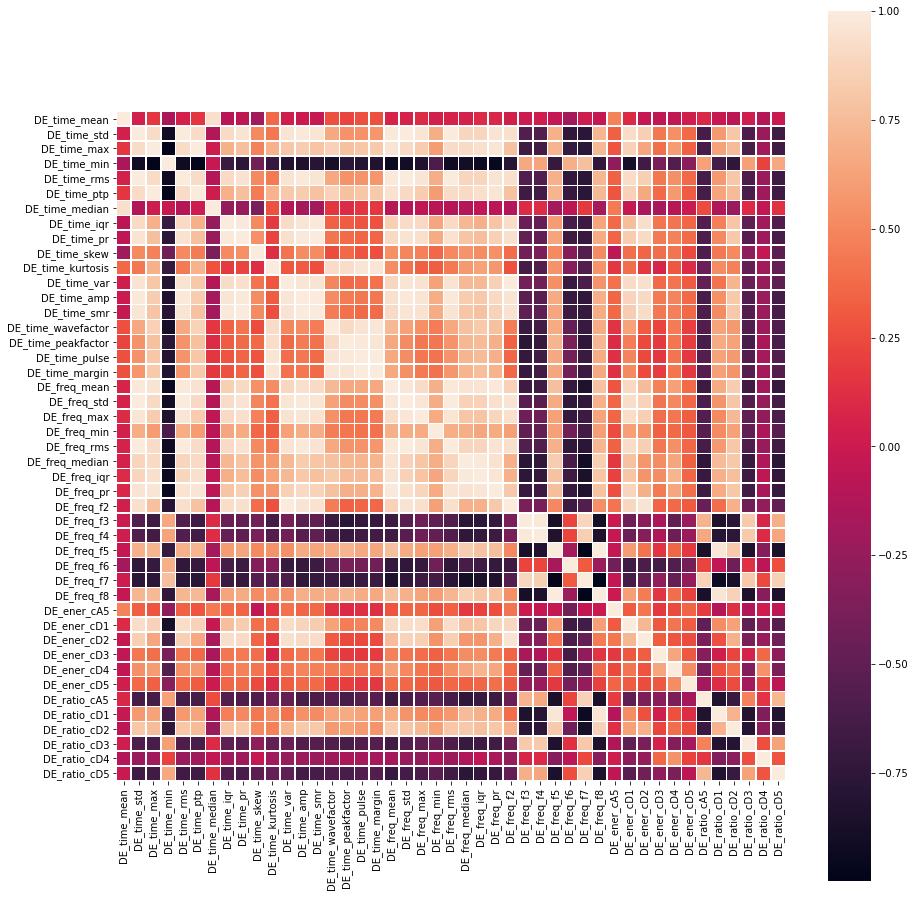

In [20]:
# 各个特征之间的相关关系
internal_chars = new_columns[0:45]
corrmat = fea_table[internal_chars].corr()
f, ax = plt.subplots(figsize=(15, 16))
plt.xticks(rotation='90')
sb.heatmap(corrmat, square=True, linewidths=0.5, annot=False)
plt.show()

In [21]:
# 划分数据集，后面直接使用KFold
from sklearn.model_selection  import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(features, labels, train_size=0.9, random_state=10010)
X_train.shape

(473, 90)

In [22]:
# 评分规则，f1-score 权重 ball inner outer 各占0.3 normal 0.1
from sklearn.metrics import f1_score,confusion_matrix
def get_final_score(real,predict,mat=False,score=False):
    '''
    list,list,boolean,boolean
    confusion_matrix,scores of classes
    '''
    # 共有4类
    final_score = 0
    if mat:
        mat = confusion_matrix(real,predict)
        print(mat)
    for i in range(4):
        real_i = (real == i)
        # print(real_i)
        predict_i = (predict == i)
        # print(predict_i)
        this_f1_score = f1_score(real_i, predict_i)
        if score:
            print(i,":",this_f1_score)
        if i == 0:
            this_f1_score = this_f1_score*0.1
        else:
            this_f1_score = this_f1_score*0.3
        final_score += this_f1_score
    return final_score

## 决策树

In [23]:
# 决策树分类器
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score,cross_val_predict, KFold
# Create the classifier
decision_tree_classifier = DecisionTreeClassifier()
# 10 Fold
kf = KFold(n_splits = 10, shuffle = True, random_state = 10010)
scores = []
for train_index, test_index in kf.split(features):
    X_train, X_test, Y_train, Y_test = features[train_index,:],features[test_index,:],labels[train_index],labels[test_index]    
    # Train the classifier on the training set
    decision_tree_classifier.fit(X_train, Y_train)
    # test predict
    Y_test_predict = decision_tree_classifier.predict(X_test)
    # my score
    scores.append(get_final_score(Y_test,Y_test_predict))
scores = np.asarray(scores)
print("mean_score",scores.mean())

mean_score 0.9181327838827839


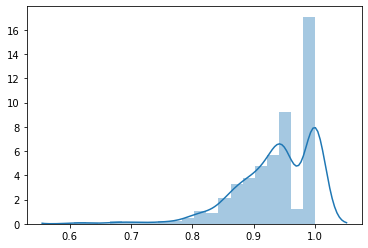

In [24]:
# 观察不同划分的影响
import warnings
warnings.filterwarnings("ignore")

scores = []
for i in range(1000):
    X_train, X_test, Y_train, Y_test = train_test_split(features, labels, train_size=0.9, random_state=i)
    # Create the classifier
    decision_tree_classifier = DecisionTreeClassifier()
    # Train the classifier on the training set
    decision_tree_classifier.fit(X_train, Y_train)
    # Validate the classifier on the testing set using classification accuracy
    Y_test_predict = decision_tree_classifier.predict(X_test)
    score = get_final_score(Y_test,Y_test_predict)
    scores.append(score)
sb.distplot(scores)

看起来好像还行

## SGD分类器

In [25]:
# SGD分类器
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings("ignore")

# Create the classifier
sgd_clf = SGDClassifier(alpha=0.001,max_iter=500000)
# 10 Fold
kf = KFold(n_splits = 10, shuffle = True, random_state = 10010)
scores = []
for train_index, test_index in kf.split(features):
    X_train, X_test, Y_train, Y_test = features[train_index,:],features[test_index,:],labels[train_index],labels[test_index]    
    # Train the classifier on the training set
    sgd_clf.fit(X_train, Y_train)
    # test predict
    Y_test_predict = sgd_clf.predict(X_test)
    # my score
    scores.append(get_final_score(Y_test,Y_test_predict))
scores = np.asarray(scores)
print("mean_score",scores.mean())

mean_score 0.3835432996619693


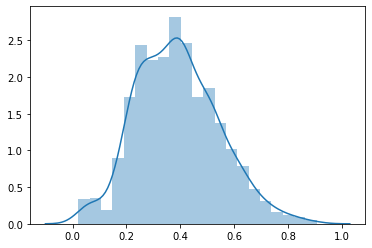

In [26]:
import warnings
warnings.filterwarnings("ignore")
# 观察不同划分的影响
scores = []
for i in range(1000):
    X_train, X_test, Y_train, Y_test = train_test_split(features, labels, train_size=0.9, random_state=i)
    # Create the classifier
    sgd_clf = SGDClassifier(alpha=0.001,max_iter=50000)
    # Train the classifier on the training set
    sgd_clf.fit(X_train, Y_train)
    # Validate the classifier on the testing set using classification accuracy
    Y_test_predict = sgd_clf.predict(X_test)
    score = get_final_score(Y_test,Y_test_predict)
    scores.append(score)
sb.distplot(scores)

看起来不太行

## SVM

In [27]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings("ignore")


# 10 Fold
kf = KFold(n_splits = 10, shuffle = True, random_state = 10010)
scores = []
for train_index, test_index in kf.split(features):
    X_train, X_test, Y_train, Y_test = features[train_index,:],features[test_index,:],labels[train_index],labels[test_index]    
    # Create the classifier
    svc_clf = SVC(C=100, kernel='poly',verbose=False,max_iter=1000000)
    # Train the classifier on the training set
    svc_clf.fit(X_train, Y_train)
    # test predict
    Y_test_predict = svc_clf.predict(X_test)
    # my score
    scores.append(get_final_score(Y_test,Y_test_predict,mat=True))
scores = np.asarray(scores)
print("mean_score",scores.mean())

[[35  0  0  0]
 [ 0  4  0  0]
 [ 0  1  5  0]
 [ 0  0  4  4]]
[[38  0  0  0]
 [ 0  3  0  1]
 [ 0  1  3  3]
 [ 0  0  1  3]]
[[37  0  0  0]
 [ 0  3  0  0]
 [ 0  0  3  1]
 [ 0  0  1  8]]
[[38  0  0  0]
 [ 0  4  0  0]
 [ 0  3  1  1]
 [ 0  0  1  5]]
[[39  0  0  0]
 [ 0  4  0  0]
 [ 0  3  4  1]
 [ 0  0  0  2]]
[[41  0  0  0]
 [ 0  2  1  0]
 [ 0  0  4  0]
 [ 0  0  0  5]]
[[31  0  0  0]
 [ 0  8  0  0]
 [ 0  1  5  4]
 [ 0  0  0  3]]
[[32  0  0  0]
 [ 0  9  0  0]
 [ 0  0  4  1]
 [ 0  0  0  6]]
[[32  0  0  0]
 [ 0  7  0  0]
 [ 0  1  2  2]
 [ 0  0  2  6]]
[[39  0  0  0]
 [ 0  8  0  0]
 [ 0  1  1  0]
 [ 0  0  0  3]]
mean_score 0.7955979608626667


一般般

## 随机森林

In [28]:
# 随机森林
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings("ignore")

# Create the classifier
forest_clf = RandomForestClassifier()
# 10 Fold
kf = KFold(n_splits = 10, shuffle = True, random_state = 10010)
scores = []
for train_index, test_index in kf.split(features):
    X_train, X_test, Y_train, Y_test = features[train_index,:],features[test_index,:],labels[train_index],labels[test_index]    
    # Train the classifier on the training set
    forest_clf.fit(X_train, Y_train)
    # test predict
    Y_test_predict = forest_clf.predict(X_test)
    # my score
    scores.append(get_final_score(Y_test,Y_test_predict,mat=True,score=True))
scores = np.asarray(scores)
print("mean_score",scores.mean())

[[35  0  0  0]
 [ 0  4  0  0]
 [ 0  0  6  0]
 [ 0  0  0  8]]
0 : 1.0
1 : 1.0
2 : 1.0
3 : 1.0
[[38  0  0  0]
 [ 0  3  0  1]
 [ 0  0  7  0]
 [ 0  0  1  3]]
0 : 1.0
1 : 0.8571428571428571
2 : 0.9333333333333333
3 : 0.75
[[37  0  0  0]
 [ 0  3  0  0]
 [ 0  0  4  0]
 [ 0  0  0  9]]
0 : 1.0
1 : 1.0
2 : 1.0
3 : 1.0
[[38  0  0  0]
 [ 0  4  0  0]
 [ 0  0  5  0]
 [ 0  0  0  6]]
0 : 1.0
1 : 1.0
2 : 1.0
3 : 1.0
[[39  0  0  0]
 [ 0  4  0  0]
 [ 0  0  8  0]
 [ 0  0  0  2]]
0 : 1.0
1 : 1.0
2 : 1.0
3 : 1.0
[[41  0  0  0]
 [ 0  3  0  0]
 [ 0  0  4  0]
 [ 0  0  0  5]]
0 : 1.0
1 : 1.0
2 : 1.0
3 : 1.0
[[31  0  0  0]
 [ 0  8  0  0]
 [ 0  0 10  0]
 [ 0  0  0  3]]
0 : 1.0
1 : 1.0
2 : 1.0
3 : 1.0
[[32  0  0  0]
 [ 0  9  0  0]
 [ 0  0  5  0]
 [ 0  0  0  6]]
0 : 1.0
1 : 1.0
2 : 1.0
3 : 1.0
[[32  0  0  0]
 [ 0  7  0  0]
 [ 0  1  4  0]
 [ 0  0  0  8]]
0 : 1.0
1 : 0.9333333333333333
2 : 0.888888888888889
3 : 1.0
[[39  0  0  0]
 [ 0  7  0  1]
 [ 0  0  2  0]
 [ 0  0  0  3]]
0 : 1.0
1 : 0.9333333333333333
2 : 1.0
3 :

看起来不错，就用这个试试吧

# 测试集说明

## 一、测试集数据说明
数据中包含一个文件夹，test，用作测试集。   
test文件夹中包含多个数据文件，文件名并不包含含义，仅用作记号。    
每个数据文件可能包含如下多维信号（部分文件可能其中不包括某些维度的信号）：   
DE_time:驱动端加速度数据   
FE_time:风扇端加速度数据   
BA_time:基本加速度数据   
RPM:每分钟转速数据，在提取时实际上RPM对于每个文件只有一个值，但为了文件格式整齐，扩展成了一列，即实际上这一列都是同一个值，代表该文件的RPM

特别说明：TEST08的原始数据不含RPM，经查，该数据的RPM是1750，有需要的可以使用该数值作为TEST08中RPM的参考值

## 二、测试集答案提交形式
提交答案时，约定normal(NORMAL), ball(B), outer race(OR), inner race(IR)的预测输出标签为0, 1, 2, 3。   
提交csv文件，文件分两列，第一列为按序预测结果(0/1/2/3)，第二列为预测结果所在的测试集文件(字符串形式，例如TEST01)，分别以label和filename作为列名。具体形式参照提供的example.csv。

## 三、评分规则
使用四类的f1-score(precision和recall值的调和平均数)加权和进行评价，按照上面的标签约定，即：   
score = [0.3×f1score(class1) + 0.3×f1score(class2) + 0.3×f1score(class3) + 0.1×f1score(class0)]*100   
满分为100分。

In [29]:
# 观察test01
filename = "TEST1.csv"
tmp_data = pd.read_csv(os.path.join(DATA_DIR_PATH, datasets[1], filename))
tmp_data

,DE_time,FE_time,RPM
0,-0.059664,0.007602,1725
1,-0.063628,-0.006575,1725
2,-0.027120,-0.068416,1725
3,0.002712,-0.087935,1725
4,-0.009596,-0.046227,1725
...,...,...,...
3495,-0.091582,0.062458,1725
3496,-0.068634,0.036160,1725
3497,-0.025034,-0.008424,1725
3498,-0.006467,-0.025476,1725


## 随机森林

经过一些模型训练的经验总结，选择窗口长度为1500，接下来优化一下模型参数

In [30]:
# 重新生成数据集
windowlen = 1500
features,labels = get_features(train_files,train_data,windowlen)

This label is: NORMAL 0
this file's index is: 1
Total lines: 182953
this file's index is: 2
Total lines: 362927
This label is: B 1
this file's index is: 1
Total lines: 14708
this file's index is: 2
Total lines: 14621
this file's index is: 3
Total lines: 14638
this file's index is: 4
Total lines: 14569
this file's index is: 5
Total lines: 14656
this file's index is: 6
Total lines: 14604
This label is: OR 2
this file's index is: 1
Total lines: 7336
this file's index is: 2
Total lines: 7319
this file's index is: 3
Total lines: 7336
this file's index is: 4
Total lines: 7310
this file's index is: 5
Total lines: 7302
this file's index is: 6
Total lines: 7345
this file's index is: 7
Total lines: 7310
this file's index is: 8
Total lines: 7310
this file's index is: 9
Total lines: 7345
this file's index is: 10
Total lines: 7319
this file's index is: 11
Total lines: 7328
this file's index is: 12
Total lines: 7319
this file's index is: 13
Total lines: 7319
this file's index is: 14
Total lines: 734

In [31]:
features.shape

(526, 90)

In [32]:
# 随机森林训练
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings("ignore")
# Create the classifier
forest_clf = RandomForestClassifier()
# 10 Fold
kf = KFold(n_splits = 10, shuffle = True, random_state = 10010)
scores = []
for train_index, test_index in kf.split(features):
    X_train, X_test, Y_train, Y_test = features[train_index,:],features[test_index,:],labels[train_index],labels[test_index]    
    # Train the classifier on the training set
    forest_clf.fit(X_train, Y_train)
    # test predict
    Y_test_predict = forest_clf.predict(X_test)
    # my score
    scores.append(get_final_score(Y_test,Y_test_predict,mat=True,score=True))
scores = np.asarray(scores)
print("mean_score",scores.mean())

[[35  0  0  0]
 [ 0  4  0  0]
 [ 0  0  6  0]
 [ 0  0  0  8]]
0 : 1.0
1 : 1.0
2 : 1.0
3 : 1.0
[[38  0  0  0]
 [ 0  3  0  1]
 [ 0  0  7  0]
 [ 0  0  1  3]]
0 : 1.0
1 : 0.8571428571428571
2 : 0.9333333333333333
3 : 0.75
[[37  0  0  0]
 [ 0  3  0  0]
 [ 0  0  4  0]
 [ 0  0  0  9]]
0 : 1.0
1 : 1.0
2 : 1.0
3 : 1.0
[[38  0  0  0]
 [ 0  4  0  0]
 [ 0  0  5  0]
 [ 0  0  0  6]]
0 : 1.0
1 : 1.0
2 : 1.0
3 : 1.0
[[39  0  0  0]
 [ 0  4  0  0]
 [ 0  0  8  0]
 [ 0  0  0  2]]
0 : 1.0
1 : 1.0
2 : 1.0
3 : 1.0
[[41  0  0  0]
 [ 0  3  0  0]
 [ 0  0  4  0]
 [ 0  0  0  5]]
0 : 1.0
1 : 1.0
2 : 1.0
3 : 1.0
[[31  0  0  0]
 [ 0  8  0  0]
 [ 0  0 10  0]
 [ 0  0  0  3]]
0 : 1.0
1 : 1.0
2 : 1.0
3 : 1.0
[[32  0  0  0]
 [ 0  9  0  0]
 [ 0  0  5  0]
 [ 0  0  0  6]]
0 : 1.0
1 : 1.0
2 : 1.0
3 : 1.0
[[32  0  0  0]
 [ 0  7  0  0]
 [ 0  1  4  0]
 [ 0  0  0  8]]
0 : 1.0
1 : 0.9333333333333333
2 : 0.888888888888889
3 : 1.0
[[39  0  0  0]
 [ 0  7  0  1]
 [ 0  0  2  0]
 [ 0  0  0  3]]
0 : 1.0
1 : 0.9333333333333333
2 : 1.0
3 :

使用网格搜索GridSearchCV, RandomizedSearchCV初步调参

In [33]:
forest_clf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

* n_estimators：表示森林里树的个数
* max_features：每个决策树的随机选择的特征数目
* max_depth: 树的最深深度
* bootstrap：自助法，默认为True

In [34]:
def my_score(estimator, X, Y):
    Y_predict = estimator.predict(X)
    return get_final_score(Y,Y_predict)

In [35]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# 参数范围
n_estimators_range = [5,10,15,20,30,50]
max_features_range = [10,20,30,50,90]
max_depth_range = [1,5,10,50,100,150,200]
bootstrap_range = [True,False]
param_grid = {'n_estimators':n_estimators_range,'max_features':max_features_range,
              'max_depth':max_depth_range,'bootstrap':bootstrap_range}

gsearch = GridSearchCV(estimator = forest_clf, param_grid = param_grid, scoring=my_score)
gsearch.fit(features,labels)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [36]:
# print('度量记录：',gsearch.cv_results_)  # 包含每次训练的相关信息
# print('最佳度量值:',gsearch.best_score_)  # 获取最佳度量值
print('最佳参数：',gsearch.best_params_)  # 获取最佳度量值时的代定参数的值。是一个字典
print('最佳模型：',gsearch.best_estimator_)  # 获取最佳度量时的分类器模型

最佳参数： {'bootstrap': False, 'max_depth': 200, 'max_features': 10, 'n_estimators': 10}
最佳模型： RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=200, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


结合测试反馈分数，再次人工调参。

In [37]:
import joblib
forest_clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=150, max_features=30, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
# forest_clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
#                        max_depth=150, max_features=20, max_leaf_nodes=None,
#                        min_impurity_decrease=0.0, min_impurity_split=None,
#                        min_samples_leaf=1, min_samples_split=2,
#                        min_weight_fraction_leaf=0.0, n_estimators=15,
#                        n_jobs=None, oob_score=False, random_state=None,
#                        verbose=0, warm_start=False)
# 10 Fold
kf = KFold(n_splits = 10, shuffle = True, random_state = 10010)
scores = []
for train_index, test_index in kf.split(features):
    X_train, X_test, Y_train, Y_test = features[train_index,:],features[test_index,:],labels[train_index],labels[test_index]    
    # Train the classifier on the training set
    forest_clf.fit(X_train, Y_train)
    # test predict
    Y_test_predict = forest_clf.predict(X_test)
    # my score
    scores.append(get_final_score(Y_test,Y_test_predict,mat=True,score=True))
joblib.dump(forest_clf, 'forest_clf.model')
scores = np.asarray(scores)
print("mean_score",scores.mean())

[[35  0  0  0]
 [ 0  4  0  0]
 [ 0  0  6  0]
 [ 0  0  0  8]]
0 : 1.0
1 : 1.0
2 : 1.0
3 : 1.0
[[38  0  0  0]
 [ 0  3  0  1]
 [ 0  0  7  0]
 [ 0  0  1  3]]
0 : 1.0
1 : 0.8571428571428571
2 : 0.9333333333333333
3 : 0.75
[[37  0  0  0]
 [ 0  3  0  0]
 [ 0  0  4  0]
 [ 0  0  0  9]]
0 : 1.0
1 : 1.0
2 : 1.0
3 : 1.0
[[38  0  0  0]
 [ 0  4  0  0]
 [ 0  0  5  0]
 [ 0  0  0  6]]
0 : 1.0
1 : 1.0
2 : 1.0
3 : 1.0
[[39  0  0  0]
 [ 0  3  1  0]
 [ 0  0  8  0]
 [ 0  0  0  2]]
0 : 1.0
1 : 0.8571428571428571
2 : 0.9411764705882353
3 : 1.0
[[41  0  0  0]
 [ 0  3  0  0]
 [ 0  0  4  0]
 [ 0  0  0  5]]
0 : 1.0
1 : 1.0
2 : 1.0
3 : 1.0
[[31  0  0  0]
 [ 0  8  0  0]
 [ 0  0 10  0]
 [ 0  0  0  3]]
0 : 1.0
1 : 1.0
2 : 1.0
3 : 1.0
[[32  0  0  0]
 [ 0  9  0  0]
 [ 0  0  5  0]
 [ 0  0  0  6]]
0 : 1.0
1 : 1.0
2 : 1.0
3 : 1.0
[[32  0  0  0]
 [ 0  7  0  0]
 [ 0  1  4  0]
 [ 0  0  0  8]]
0 : 1.0
1 : 0.9333333333333333
2 : 0.888888888888889
3 : 1.0
[[39  0  0  0]
 [ 0  7  0  1]
 [ 0  0  2  0]
 [ 0  0  0  3]]
0 : 1.0
1 : 

输出测试集结果：

In [38]:
output_columns = ['label','filename']
# label filename
output_df = pd.DataFrame(columns=output_columns)

# judge
for i in range(test_file_num):
    filename = test_file+str(i+1)
    print(filename)
    tmp_data = pd.read_csv(os.path.join(DATA_DIR_PATH, datasets[1], filename+".csv"))
    tmp_features = get_file_features(tmp_data,windowlen)
    tmp_predict = forest_clf.predict(tmp_features)
    tmp_result = np.array([0,0,0,0])
    for j in tmp_predict:
        tmp_result[j] += 1
        tmp_df = pd.DataFrame([[j,filename]],columns=output_columns)
        output_df = output_df.append(tmp_df, ignore_index=True)
    tmp_class = tmp_result.argmax()
    print("result:",tmp_result,",class:",tmp_class)
output_df.to_csv(os.path.join(DATA_DIR_PATH,"forest"+str(windowlen)+".csv"),index = False)
output_df

TEST1
Total lines: 3500
result: [2 0 0 0] ,class: 0
TEST2
Total lines: 3500
result: [2 0 0 0] ,class: 0
TEST3
Total lines: 3500
result: [0 0 0 2] ,class: 3
TEST4
Total lines: 3500
result: [0 0 0 2] ,class: 3
TEST5
Total lines: 3500
result: [2 0 0 0] ,class: 0
TEST6
Total lines: 3500
result: [2 0 0 0] ,class: 0
TEST7
Total lines: 3500
result: [2 0 0 0] ,class: 0
TEST8
Total lines: 3500
result: [0 0 2 0] ,class: 2
TEST9
Total lines: 3500
result: [2 0 0 0] ,class: 0
TEST10
Total lines: 3500
result: [0 2 0 0] ,class: 1
TEST11
Total lines: 3500
result: [2 0 0 0] ,class: 0
TEST12
Total lines: 3500
result: [2 0 0 0] ,class: 0
TEST13
Total lines: 3500
result: [2 0 0 0] ,class: 0
TEST14
Total lines: 3500
result: [2 0 0 0] ,class: 0
TEST15
Total lines: 3500
result: [2 0 0 0] ,class: 0
TEST16
Total lines: 3500
result: [2 0 0 0] ,class: 0
TEST17
Total lines: 3500
result: [0 0 0 2] ,class: 3
TEST18
Total lines: 3500
result: [2 0 0 0] ,class: 0
TEST19
Total lines: 3500
result: [2 0 0 0] ,class: 0
TE

,label,filename
0,0,TEST1
1,0,TEST1
2,0,TEST2
3,0,TEST2
4,3,TEST3
...,...,...
279,3,TEST140
280,1,TEST141
281,2,TEST141
282,3,TEST142


上传到网站测试得分为100。

## 直接使用我们提供的model

In [39]:
forest_load=joblib.load("../cwru.model")
output_columns = ['label','filename']
# label filename
output_df = pd.DataFrame(columns=output_columns)

# judge
for i in range(test_file_num):
    filename = test_file+str(i+1)
    print(filename)
    tmp_data = pd.read_csv(os.path.join(DATA_DIR_PATH, datasets[1], filename+".csv"))
    tmp_features = get_file_features(tmp_data,windowlen)
    tmp_predict = forest_load.predict(tmp_features)
    tmp_result = np.array([0,0,0,0])
    for j in tmp_predict:
        tmp_result[j] += 1
        tmp_df = pd.DataFrame([[j,filename]],columns=output_columns)
        output_df = output_df.append(tmp_df, ignore_index=True)
    tmp_class = tmp_result.argmax()
    print("result:",tmp_result,",class:",tmp_class)
output_df.to_csv(os.path.join(DATA_DIR_PATH,"forestloadmodel"+str(windowlen)+".csv"),index = False)
output_df

TEST1
Total lines: 3500
result: [2 0 0 0] ,class: 0
TEST2
Total lines: 3500
result: [2 0 0 0] ,class: 0
TEST3
Total lines: 3500
result: [0 0 0 2] ,class: 3
TEST4
Total lines: 3500
result: [0 0 0 2] ,class: 3
TEST5
Total lines: 3500
result: [2 0 0 0] ,class: 0
TEST6
Total lines: 3500
result: [2 0 0 0] ,class: 0
TEST7
Total lines: 3500
result: [2 0 0 0] ,class: 0
TEST8
Total lines: 3500
result: [0 0 2 0] ,class: 2
TEST9
Total lines: 3500
result: [2 0 0 0] ,class: 0
TEST10
Total lines: 3500
result: [0 2 0 0] ,class: 1
TEST11
Total lines: 3500
result: [2 0 0 0] ,class: 0
TEST12
Total lines: 3500
result: [2 0 0 0] ,class: 0
TEST13
Total lines: 3500
result: [2 0 0 0] ,class: 0
TEST14
Total lines: 3500
result: [2 0 0 0] ,class: 0
TEST15
Total lines: 3500
result: [2 0 0 0] ,class: 0
TEST16
Total lines: 3500
result: [2 0 0 0] ,class: 0
TEST17
Total lines: 3500
result: [0 0 0 2] ,class: 3
TEST18
Total lines: 3500
result: [2 0 0 0] ,class: 0
TEST19
Total lines: 3500
result: [2 0 0 0] ,class: 0
TE

,label,filename
0,0,TEST1
1,0,TEST1
2,0,TEST2
3,0,TEST2
4,3,TEST3
...,...,...
279,3,TEST140
280,2,TEST141
281,2,TEST141
282,3,TEST142


上传到网站测试得分为100。

copyright @ Ryan 2020.  
This page is a rendered version of a Jupyter Notebook.  
To suggest improvements or give feedback please refer to the Readme.md.